# Введение в Pandas (DevCIT)
#### Atalov S.

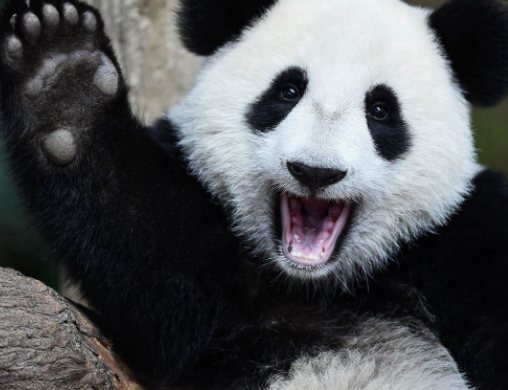

`Pandas` - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные.

В машинном обучении важен анализ данных. Мы не строим сразу модель на данных. Мы должны посмотреть, подготовить необходимые данные.

У нас будут некоторые признаки:

<div>
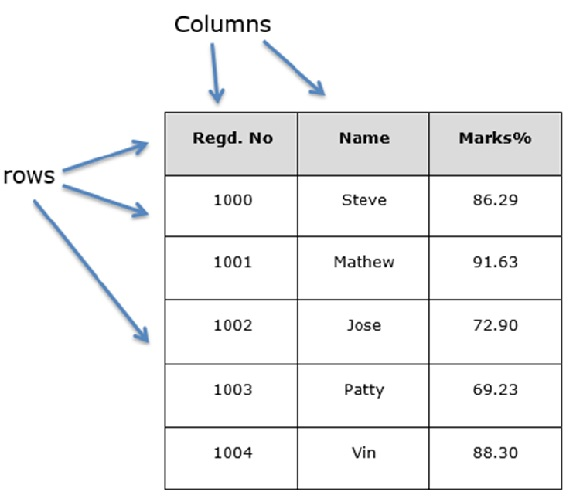
</div>

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Каждый тип данных в `Pandas` (столбец с именем и значениями) называется - `Pandas Series`.

Проще говоря это массивы, которые основаны на `NumPy Arrays`, у которых есть название столбцов и индексы.

Эту таблицу будем называть `Dataframe`.


---------

## Первичный анализ данных
### Чтение данных с Pandas

In [7]:
import pandas as pd

На практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

Загружаем `csv` файл, где `;` разделитель

In [11]:
df = pd.read_csv("test_dt.csv", sep = ";")

In [12]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


Посмотреть на первые 5 строк (по умолчанию 5, в скобках также можно указать сколько)

In [13]:
df.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


Многие методы унаследованы от `NumPy`:

In [14]:
df.tail(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


In [15]:
df.shape

(1260, 10)

In [16]:
# названия признаков
print(df.columns.values)

['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [17]:
#информация про данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


Метод describe показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [18]:
#описательная статистика данных
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


Можно сразу увидеть что переменная `wage` сильно разбросана. Т.к. `max=77.72`, а `min=1.02`.

DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.

In [20]:
df.sort_values(by="wage").head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
462,1.16,2,0,1,0,1,0,0,13,4
597,1.16,5,0,1,0,1,1,1,10,3


In [21]:
df.sort_values(by="wage", ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [22]:
# либо сразу по двум
df.sort_values(by=["female", "wage"], ascending=[True, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Column_Name']. Воспользуемся этим для ответа на вопрос: **каково среднее значение параметра "здоровье" среди опрошенных?**

In [26]:
df["goodhlth"].mean()

0.9333333333333333

In [27]:
# помним функцию <mean> из numpy?
df["female"] == 1

0        True
1        True
2        True
3       False
4       False
        ...  
1255     True
1256     True
1257     True
1258     True
1259     True
Name: female, Length: 1260, dtype: bool

In [28]:
df[df['female'] == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: dataframe[P(dataframe['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name.

In [2]:
a = df['female'] == 0
df[a]

NameError: name 'df' is not defined

In [30]:
# Возвращается Dataframe, в котором выбрали женщин
df[df["female"] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


Также, можно написать несколько условий:

In [37]:
df[ (df["female"] == 0) & (df["wage"] > 10) ]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
17,11.54,12,0,1,0,0,1,1,17,4
23,17.03,32,0,1,0,0,1,0,13,3
24,10.05,12,0,1,0,0,1,0,13,4
...,...,...,...,...,...,...,...,...,...,...
1108,26.24,37,0,1,0,0,1,0,12,2
1113,26.24,37,0,1,0,0,1,0,12,3
1219,23.16,9,0,1,0,0,0,1,10,3
1244,12.82,15,1,1,0,0,1,0,13,3


In [ ]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)].head()

Если мы применяем условие, то возвращается новый Dataframe, к которому также можем обращаться.

**Средняя заработная плата у женщин:**

In [46]:
df[df["female"] == 1]["wage"].mean()

4.299357798165136

Воспользуемся этим для ответа на вопрос: **На сколько средняя заработная плата мужчин выше средней заработной платы среди женщин?**

In [56]:
average_male_wage = df[df["female"] == 0]["wage"].mean()
average_female_wage = df[df["female"] == 1]["wage"].mean()
print(average_male_wage)
print(average_female_wage)
average_diff = average_male_wage - average_female_wage
print(average_diff)

7.3688228155339734
4.299357798165136
3.069465017368837


**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [67]:
df[(df["female"] == 0) & (df["union"] == 1) & (df["exper"] > 10)]["wage"].max()


21.74

**На сколько средняя заработная плата белых больше черных?**

In [69]:
aver_sal = df[df["black"] == 0]["wage"].mean()
aver_sal1 = df[df["black"] == 1]["wage"].mean()
print(aver_sal)
print(aver_sal1)
print(aver_sal - aver_sal1)

6.384353041987999
5.332150537634408
1.0522025043535912


**На сколько среднее количество лет образования у белых мужчин больше чем у черных мужчин?**

In [70]:
aver_edu1 = df[df["black"] == 0]["educ"].mean()
aver_edu2 = df[df["black"] == 1]["educ"].mean()
print(aver_edu1)
print(aver_edu2)
print(aver_edu1 - aver_edu2)

12.665809768637532
11.279569892473118
1.3862398761644137


**Сколько женатых мужчин работают в сфере услуг?**

In [73]:
df[(df["female"] == 0)  & (df["married"] == 1) & (df["service"] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
3,11.57,38,0,1,0,0,1,1,16,3
12,5.14,19,0,1,0,0,1,1,17,2
17,11.54,12,0,1,0,0,1,1,17,4
21,6.79,19,0,1,0,0,1,1,14,3
22,6.87,33,0,1,0,0,1,1,12,3
...,...,...,...,...,...,...,...,...,...,...
1179,6.41,41,0,1,0,0,1,1,12,2
1194,4.81,13,0,1,1,0,1,1,12,3
1209,3.57,13,0,1,0,0,1,1,13,4
1210,1.58,27,0,1,0,0,1,1,12,4


**Влияет ли семейный статус на зарплату?**